In [3]:
import numpy as np
import os
from tqdm import tqdm
import enzope
from matplotlib import pyplot as plt

#### En este notebook voy a explorar tecnicas para medir el r_crit y r_opt de un sistema.

In [91]:
def plot_survival(r, w, r_max, r_crit):
    for i in range(len(r)):
        # Assign a new color to every iteration and plot
        color = plt.cm.Dark2(i)
        plt.scatter(r[i], w[i], label=f'r_max={r_max[i]}', c=color, s=4, alpha=.4, marker='o')    

    plt.axvline(r_crit, color='black', label='r_crit', linestyle='--')
    plt.xticks(np.linspace(0, 1, 11))
    plt.xlim(0, 1)
    plt.yscale('log')
    plt.xlabel('r')
    plt.ylabel(r'$w_f$')
    plt.legend()
    plt.title(r'Final wealth of agents vs. $r$')
    plt.grid(which='both')

In [5]:
datapath = os.path.join(os.getcwd(), 'data')
print(datapath)

d:\Workspace\code\enzope\enzope\tests\runs largas\cpu\3_r_opt y r_crit\preliminaries\data


### Funcion principal para correr y guardar

In [5]:
def run(f=.1, mcs=100000, r_m=1, reps=1):
    models = [enzope.CPUModel(n_agents=1000, f=f, r_max=r_m) for _ in range(reps)]
    for model in tqdm(models):
        model.MCS(mcs)

    [model.save(os.path.join(datapath, f'model_r_m={r_m}_f={f}_mcs={mcs}_rep={i}.pkl')) for i, model in enumerate(models)]

#### Corrida para f=1. Miro el scatter plot de riqueza final en funcion de riesgo, para r en todo el rango y $r_{max}$ = .5 (el $r_{crit}$ teorico es $\sim$ .37)

In [48]:
for r_m in [1, .5]:
    run(f=.1, mcs=100000, r_m=r_m, reps=2)

100%|██████████| 2/2 [29:59<00:00, 899.89s/it]


#### Corrida para f=.2, $r_{crit}$ $\sim$ .63

In [6]:
for r_m in [1, .8, .4]:
    run(f=.2, mcs=100000, r_m=r_m, reps=2)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [1:04:36<00:00, 1938.26s/it]


#### Cargo los datos

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_4796\1448998591.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(r[i], w[i], label=f'r_max={r_max[i]}', c=color, s=4, alpha=.4, marker='o')


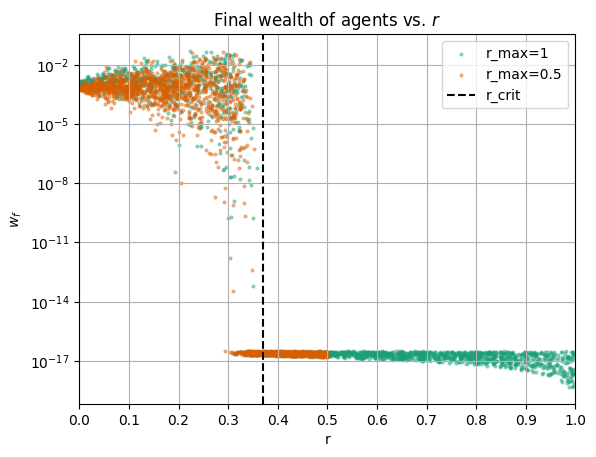

In [92]:
f = .1
r_m = [1, 0.5]
mcs = 100000
reps = 2

# Esto esta asqueroso, perdon lauti del futuro
models_r1 = [enzope.CPUModel(n_agents=1000, f=f) for i in range(reps)]
models_r5 = [enzope.CPUModel(n_agents=1000, f=f) for i in range(reps)]

for i in range(reps):
    models_r1[i].load(os.path.join(datapath, f'model_r_m={r_m[0]}_f={f}_mcs={mcs}_rep={i}.pkl'))
    models_r5[i].load(os.path.join(datapath, f'model_r_m={r_m[1]}_f={f}_mcs={mcs}_rep={i}.pkl'))

w_r1 = [model.w for model in models_r1]
w_r1 = [w for sublist in w_r1 for w in sublist]
r_r1 = [model.r for model in models_r1]
r_r1 = [r for sublist in r_r1 for r in sublist]

w_r5 = [model.w for model in models_r5]
w_r5 = [w for sublist in w_r5 for w in sublist]
r_r5 = [model.r for model in models_r5]
r_r5 = [r for sublist in r_r5 for r in sublist]

w = [w_r1, w_r5]
r = [r_r1, r_r5]

plot_survival(r, w, r_m, r_crit=.37)

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_4796\1848798027.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(r[i], w[i], label=f'r_max={r_max[i]}', c=color, s=4, alpha=.4, marker='o')


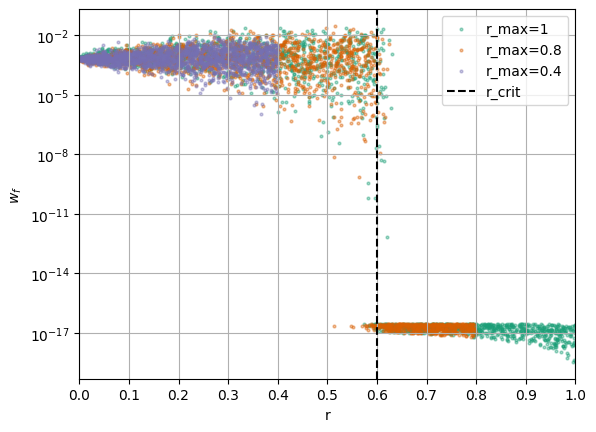

In [83]:
f = .2
r_m = [1, .8, .4]
mcs = 100000
reps = 2

models_r1 = [enzope.CPUModel(n_agents=1000, f=f) for i in range(reps)]
models_r8 = [enzope.CPUModel(n_agents=1000, f=f) for i in range(reps)]
models_r4 = [enzope.CPUModel(n_agents=1000, f=f) for i in range(reps)]

for i in range(reps):
    models_r1[i].load(os.path.join(datapath, f'model_r_m={r_m[0]}_f={f}_mcs={mcs}_rep={i}.pkl'))
    models_r8[i].load(os.path.join(datapath, f'model_r_m={r_m[1]}_f={f}_mcs={mcs}_rep={i}.pkl'))
    models_r4[i].load(os.path.join(datapath, f'model_r_m={r_m[2]}_f={f}_mcs={mcs}_rep={i}.pkl'))

w_r1 = [model.w for model in models_r1]
w_r1 = [w for sublist in w_r1 for w in sublist]
r_r1 = [model.r for model in models_r1]
r_r1 = [r for sublist in r_r1 for r in sublist]

w_r8 = [model.w for model in models_r8]
w_r8 = [w for sublist in w_r8 for w in sublist]
r_r8 = [model.r for model in models_r8]
r_r8 = [r for sublist in r_r8 for r in sublist]

w_r4 = [model.w for model in models_r4]
w_r4 = [w for sublist in w_r4 for w in sublist]
r_r4 = [model.r for model in models_r4]
r_r4 = [r for sublist in r_r4 for r in sublist]

w = [w_r1, w_r8, w_r4]
r = [r_r1, r_r8, r_r4]

plot_survival(r, w, r_m, r_crit=.6)

#### Esto es viejo: cargar archivos y graficar

In [ ]:
risks = [model.r for model in models]
wealths = [model.w for model in models]
# flatten risks
risks = [r for sublist in risks for r in sublist]
# flatten wealths
wealths = [w for sublist in wealths for w in sublist]

risks_rm = [model.r for model in models_rm]
wealths_rm = [model.w for model in models_rm]

risks_rm = [r for sublist in risks_rm for r in sublist]
wealths_rm = [w for sublist in wealths_rm for w in sublist]

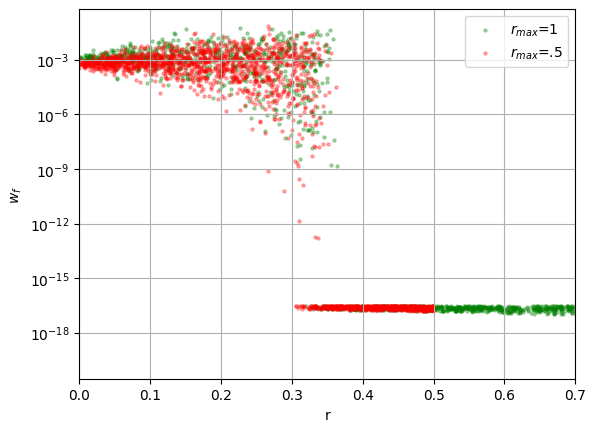

In [93]:
plot_survival(risks, wealths, risks_rm, wealths_rm)

In [97]:
risks2 = [model2.r for model2 in models2]
wealths2 = [model2.w for model2 in models2]
# flatten risks
risks2 = [r for sublist in risks2 for r in sublist]
# flatten wealths
wealths2 = [w for sublist in wealths2 for w in sublist]

risks2_rm = [model2.r for model2 in models2_rm]
wealths2_rm = [model2.w for model2 in models2_rm]

risks2_rm = [r for sublist in risks2_rm for r in sublist]
wealths2_rm = [w for sublist in wealths2_rm for w in sublist]

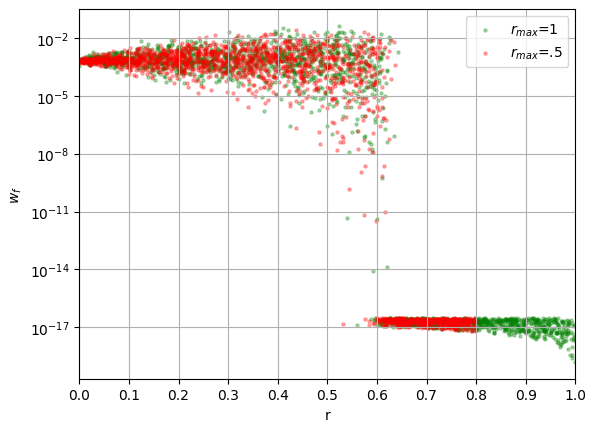

In [100]:
plot_survival(risks2, wealths2, risks2_rm, wealths2_rm)

### Para agregar al dropbox de Thiago/Seba

#### Curvas de r_max para distintos f
- Especificar N y mcs
- Curvas de Gini y actives en funcion de f [0 a .5]
- Decir que para f=0 solo cambia el tiempo que toma hacer la simulacion
- Sin embargo, f!=0 cambia el resultado final, loco no?
- Esto se ve incluso en los agentes activos.

#### Por qué esta pasando esto?
- Citar tesis juli y figura de r_crit, r_opt
- Explicar que cambiar r_max hace que haya menos agentes con r$<$r_crit
- Entonces que pasa? Si cambio r_max, cambia r_crit? Parece que no
- Figuras recientes
- Qué pasa si r_max es menor que r_crit?
- Como calcular r_opt